# 1.1.1 Пример

Рассмотрим программу обучения персептрона на языке Python. Сначала
рассмотрим основной класс персептрона, который умеет учиться по
тестовым данным.

In [38]:
class Perceptron:
    def __init__(self,N):
        self.w = list()
        for i in range(N):
            self.w.append(0)
    def calc(self,x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i]*x[i]
        return res
    def sign(self,x):
        if self.calc(x) >= 0:
            return 1
        else:
            return -1
    def learn(self,la,x,y):
        if y*self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la*y*x[i]
    def learning(self,la,T):
        for i in range(100):
            for t in T:
                self.learn(la,t[0],t[1])

In [39]:
perceptron = Perceptron(2)
la = 0.1
T = list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T)
print(perceptron.w)
print(perceptron.sign([1.5,2]))
print(perceptron.sign([3,1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


# 1.1.2 Пример

Для написания кода нейрона будем использовать библиотеку Pytnon
— NumPy:

In [40]:
import numpy as np
def sigmoid(x):
    return 1 / (1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights,inputs) + self.bias
        return sigmoid(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


In [41]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


# Задание 
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.\
Данные нейросети:\
− три входа (𝑥1, 𝑥2, 𝑥3);\
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);\
− выход (𝑜1).\
Нейроны имеют идентичные веса и пороги:\
− 𝑤 = [0.5, 0.5, 0.5]\
− 𝑏 = 0\
Данные нейросети:\
− два входа (𝑥1, 𝑥2);\
− два нейрона в скрытых слоях (ℎ1, ℎ2);\
− два выхода (𝑜1, 𝑜2).\
Нейроны имеют идентичные веса и пороги:\
− 𝑤 = [1, 0];\
− 𝑏 = 1.

In [42]:
import numpy as np
class OurNeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5,0.5,0.5])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)       
        self.o1 = Neuron(weights, bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))        
        return out_o1

class OurNeuralNetwork2:
    def __init__(self):
        weights = np.array([1,0])
        bias = 1
        
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2


network1 = OurNeuralNetwork1()
x = np.array([2,3,4])
print(network1.feedforward(x))
network2 = OurNeuralNetwork2()
x2 = np.array([2,3])
print(network2.feedforward(x2))

0.8151036049051821
(0.8757270529783324, 0.8757270529783324)


# Задание
Реализуйте классы нейронных сетей с использованием других функций
активации:
* Sigmoid
* Tanh
* ReLU

In [43]:
import numpy as np
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return math.tanh(x)

def relu(x):
    return max(0,x)

# Sigmoid

class NeuronSigmoid:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetworkSigmoid:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = NeuronSigmoid(weights, bias)
        self.h2 = NeuronSigmoid(weights, bias)
        self.o1 = NeuronSigmoid(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

# Tanh

class NeuronTanh:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class OurNeuralNetworkTanh:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = NeuronTanh(weights, bias)
        self.h2 = NeuronTanh(weights, bias)
        self.o1 = NeuronTanh(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

# ReLU

class NeuronReLU:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return relu(total)

class OurNeuralNetworkReLU:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = NeuronReLU(weights, bias)
        self.h2 = NeuronReLU(weights, bias)
        self.o1 = NeuronReLU(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

In [44]:
network1 = OurNeuralNetworkSigmoid()
network2 = OurNeuralNetworkTanh()
network3 = OurNeuralNetworkReLU()

x = np.array([2, 3])

print(f'Sigmoid: {network1.feedforward(x)}')
print(f'Tanh: {network2.feedforward(x)}')
print(f'ReLU: {network3.feedforward(x)}')


Sigmoid: 0.7216325609518421
Tanh: 0.7595094447988621
ReLU: 3


# 1.2.1 MLPClassifier

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [46]:
from sklearn.datasets import load_digits # load_boston is depricated

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset sizes: ', X_digits.shape, Y_digits.shape)

Dataset sizes:  (1797, 64) (1797,)


In [47]:
boston_url = "http://lib.stat.cmu.edu/datasets/boston"
data = pd.read_csv(boston_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([data.values[::2, :], data.values[1::2, :2]])
boston_target = data.values[1::2, 2]

X_boston, Y_boston = boston_data, boston_target
print("Datase sizes: ", X_boston.shape, Y_boston.shape)

Datase sizes:  (506, 13) (506,)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.8, test_size=0.2, stratify=Y_digits, random_state=123)
print("Train/Test Size:", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Size: (1437, 64) (360, 64) (1437,) (360,)


In [49]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
print("Test Accuracy: %.3f "%mlp_classifier.score(X_test, Y_test))
print("Training accuracy : %.3f"%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy: 0.983 
Training accuracy : 1.000


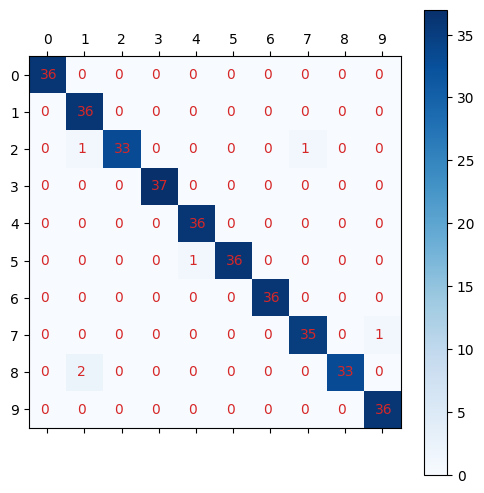

In [50]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10),range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j,i]), color='tab:red')
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [51]:
print("Loss:", mlp_classifier.loss_)
print("Number of coefs:", len(mlp_classifier.coefs_))
print("Number of Intercepts:", len(mlp_classifier.intercepts_))
print("Number of Iterations for which Estimator Ran:", mlp_classifier.n_iter_)
print("Number of Output LAyer Activation function:", mlp_classifier.out_activation_)

Loss: 0.0034728684994180608
Number of coefs: 2
Number of Intercepts: 2
Number of Iterations for which Estimator Ran: 125
Number of Output LAyer Activation function: softmax


# 1.2.2 MLPRegressor

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.8, test_size=0.2, random_state=123)
print("Train/test Size:", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/test Size: (404, 13) (102, 13) (404,) (102,)


In [54]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
print("Test R^2 score: %.3f"%mlp_regressor.score(X_test, Y_test))
print("Training R^2 Score:%3.f"%mlp_regressor.score(X_train, Y_train))


[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 score: 0.462
Training R^2 Score:  1


In [55]:
print("Loss:", mlp_regressor.loss_)
print("Number of coefs:", len(mlp_regressor.coefs_))
print("Number of Intercepts:", len(mlp_regressor.intercepts_))
print("Number of Iterations for which Estimator Ran:", mlp_regressor.n_iter_)
print("Number of Output Layer Activation function:", mlp_regressor.out_activation_)

Loss: 28.538174061119584
Number of coefs: 2
Number of Intercepts: 2
Number of Iterations for which Estimator Ran: 130
Number of Output Layer Activation function: identity


# Задание
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.\

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv \
А для регрессии датасет зависимости заработной платы от опыта работы:\
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv

In [101]:
import pandas as pd

data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [102]:
x = data.iloc[:, :-1]
y = data['variety']

print(x.shape, y.shape)

(150, 4) (150,)


In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, stratify=y, random_state=123)

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

Y_preds = mlp_classifier.predict(X_test)

print("Test Accuracy: %.3f "%mlp_classifier.score(X_test, Y_test))
print("Training accuracy : %.3f"%mlp_classifier.score(X_train, Y_train))

Test Accuracy: 0.933 
Training accuracy : 0.983


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [104]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [105]:
x = data.iloc[:, :-1]
y = data['Salary']
print(x.shape, y.shape)


(30, 1) (30,)


In [106]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=123)

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print("Test Accuracy: %.3f "%mlp_regressor.score(X_test, Y_test))
print("Training accuracy : %.3f"%mlp_regressor.score(X_train, Y_train))

Test Accuracy: -8.796 
Training accuracy : -8.261


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
